In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy


In [2]:
# Create the 10x10 grid map
# note that (0,0) is in the bottom-left corner
# the map is stored as a 1D list
# the cell (x,y) is indexed as [x+y*10] for x in [0,9] and y in [0,9]
# x is the horizontal axis, y is the vertical axis
# so the index looks like: 
#
# 90 91 92 93 94 95 96 97 98 99
# 80 81 82 83 84 85 86 87 88 89
# ...
# 10 11 12 13 14 15 16 17 18 19
# 00 01 02 03 04 05 06 07 08 09
#
# each element is a number storing the reward for ending up in that cell

# Create the map
state_reward_map = np.zeros(10 ** 2, dtype=int)

# Abot special grids: 
# If the agent enters an obstacle cell, it will always stay there, won't be able to move
# If the agent enters a goal cell, it will always stay and receive the goal state reward at every time step

# Define the rewards of special grids
# The obstacle cells are [[9, 9], [8, 9], [7, 9], [6, 9], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [0, 9],
# [9, 8], [9, 7], [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [9, 0],
# [0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0],
# [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9],
# [3, 2], [4, 2], [5, 2], [6, 2],
# [4, 4], [4, 5], [4, 6], [4, 7], [5, 7],
# [7, 4], [7, 5]]
# Ending up in an obstacle cell receives a reward of -10 every time step
obstacle_coords = [[9, 9], [8, 9], [7, 9], [6, 9], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [0, 9],
                  [9, 8], [9, 7], [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [9, 0],
                  [0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0],
                  [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9],
                  [3, 2], [4, 2], [5, 2], [6, 2],
                  [4, 4], [4, 5], [4, 6], [4, 7], [5, 7],
                  [7, 4], [7, 5]]
for cell in obstacle_coords:
    state_reward_map[cell[0] + cell[1] * 10] = -10

# Define the goal cells
goal_coords = [[8, 1]]
# Ending up in a goal cell receives a reward of 10 every time step
for cell in goal_coords:
    state_reward_map[cell[0] + cell[1] * 10] = 10
    
# Define the origin cells
origin_1_coords = [[1, 1]]
origin_2_coords = [[3, 6]]


The reward map:
[-10 -10 -10 -10 -10 -10 -10 -10 -10 -10]
[-10   0   0   0   0   0   0   0  10 -10]
[-10   0   0 -10 -10 -10 -10   0   0 -10]
[-10   0   0   0   0   0   0   0   0 -10]
[-10   0   0   0 -10   0   0 -10   0 -10]
[-10   0   0   0 -10   0   0 -10   0 -10]
[-10   0   0   0 -10   0   0   0   0 -10]
[-10   0   0   0 -10 -10   0   0   0 -10]
[-10   0   0   0   0   0   0   0   0 -10]
[-10 -10 -10 -10 -10 -10 -10 -10 -10 -10]


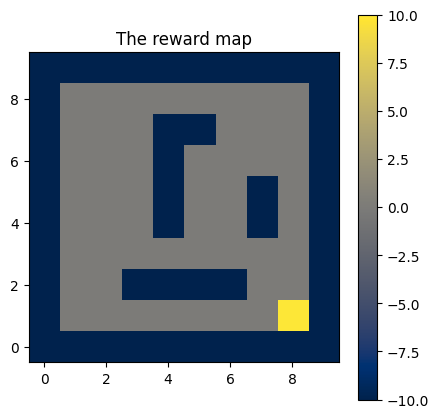

In [3]:
def test_reward_map(test_flag, state_reward_map):
    if test_flag:
        # Test the reward map
        print("The reward map:")
        for i in range(10):
            print(state_reward_map[i*10:i*10+10])
        
        plt.figure(figsize=(5, 5))
        plt.imshow(state_reward_map.reshape(10, 10), cmap='cividis', origin='lower')
        plt.colorbar()
        plt.title('The reward map')
        plt.show()


test_flag = True
test_reward_map(test_flag, state_reward_map)

# Running this test, we can see that the map is stored upside down, the origin is in the bottom-left corner
# But when displaying, we can just set the origin to 'lower' to display it correctly
# So there is no need to manually flip the map

In [4]:
def map_x_y_to_state(x, y):
    return x + y * 10


# def flat_map_to_2D_map(flat_map):
#     """
#     Be very careful that the indexes are formulated like this
#         [[90 91 92 93 94 95 96 97 98 99],
#          [80 81 82 83 84 85 86 87 88 89],
#          ...
#          [10 11 12 13 14 15 16 17 18 19],
#          [00 01 02 03 04 05 06 07 08 09]]
#     
#     :param flat_map: (100,) or (100,1) array
#     :return: 2D array (10,10), for plotting
#     """
#     # Check if the input is a 2D array, reshape to (100,) if necessary
#     if len(flat_map.shape) == 2:
#         flat_map = flat_map.reshape(-1)
#         
#     # Convert the flat map to a 2D map
#     map_2d = np.zeros((10, 10))
#     for i in range(10):
#         for j in range(10):
#             map_2d[j, i] = flat_map[i + j * 10]
#     return map_2d   


In [5]:
# test_flag = False
# 
# 
# if test_flag:
#     # Test flat_map_to_2D_map
#     # Try creating a map with the obstacles and the goal represented in 1D index
#     # We can first convert the above defined coordinates to 1D index
#     obstacle_coords_1D = [map_x_y_to_state(cell[0], cell[1]) for cell in obstacle_coords]
#     goal_coords_1D = [map_x_y_to_state(cell[0], cell[1]) for cell in goal_coords]
#     origin_1_coords_1D = [map_x_y_to_state(cell[0], cell[1]) for cell in origin_1_coords]
#     origin_2_coords_1D = [map_x_y_to_state(cell[0], cell[1]) for cell in origin_2_coords]
#     
#     # Mark the obstacles, goal, and origin cells
#     state_reward_map_1D_test = np.zeros(100)
#     for cell in obstacle_coords_1D:
#         state_reward_map_1D_test[cell] = -10
#     for cell in goal_coords_1D:
#         state_reward_map_1D_test[cell] = 10
#     for cell in origin_1_coords_1D:
#         state_reward_map_1D_test[cell] = 5
#     for cell in origin_2_coords_1D:
#         state_reward_map_1D_test[cell] = -5
#         
#     map_2d = state_reward_map_1D_test.reshape(10, 10)
#     
#     plt.figure(figsize=(5, 5))
#     plt.imshow(map_2d, cmap='cividis', origin='lower')
#     plt.colorbar()
#     plt.title('Obs, goal, and origins highlighted')
#     plt.show()


In [6]:
# Define the action list
actions = {'stay': -1, 'N': 0, 'E': 1, 'S': 2, 'W': 3}


In [7]:
# About the action rewards: 
# The robot is allowed to stay in the goal state indefinitely, and this stay action gets no reward/cost
# When in obstacle cells, the robot is forced to stay with receiving reward -10, but no additional action cost
# Taking actions at all other states (including stay), regardless of the outcome, receives a reward of -1


In [8]:
# About the action probabilities: 
# The agent moves in the intended direction with probability 0.7
# The agent moves in the left/right of the intended direction with probability 0.1
# The agent stays in the same cell with probability 0.1
# The agent won't move to the opposite direction of the intended direction

# Define a function to always make the policy matrix valid
def make_policy_valid(policy):
    """
    Make the policy matrix valid
    :param policy: a 10x10 matrix, each element is an action, the action given by the policy only depend on the state (grid)
    :return: a valid policy matrix
    """
    
    # Check if the policy matrix is 10x10
    if policy.shape != (10, 10): raise ValueError('The policy matrix should be a 10x10 matrix')
    # Each element should be an integer in [-1, 3]
    if not np.all(np.isin(policy, [-1, 0, 1, 2, 3])): raise ValueError('Each element in the policy matrix should be an integer in [-1, 3]')
    # Obstacle cells and goal cells should have no action
    obstacle_coords = [[9, 9], [8, 9], [7, 9], [6, 9], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [0, 9], [9, 8], [9, 7], [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [9, 0], [0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [3, 2], [4, 2], [5, 2], [6, 2], [4, 4], [4, 5], [4, 6], [4, 7], [5, 7], [7, 4], [7, 5]]
    goal_coords = [[8, 1]]
    for cell in obstacle_coords + goal_coords:
        policy[cell[1], cell[0]] = -1
        
    return policy


In [9]:
# Define the transition matrix
# The transition matrix is a 100x100 matrix
# Each row corresponds to a state
# Each column corresponds to a possible next state
# The element at [row, column] is the probability of transitioning from state "row" to state "column" with the intended action
# The transition matrix is sparse (mostly zeros)

# Compute the transition matrix depending on the policy
def get_transition_matrix(policy):
    """
    :param replacement: True uses the new function, otherwise uses the old function to compute the transition matrix
    :param policy: (10,10) matrix, each element is an integer from -1 to 3, representing the action to take
    :return: (100,100) matrix, representing the probability of moving from state i to state j

    state i is at [i//10, i%10]
    """
    # Check if the policy matrix is valid: 
    # 10x10
    if policy.shape != (10, 10):
        raise ValueError('The policy matrix should be a 10x10 matrix')
    # Each element should be an integer in [-1, 3]
    if not np.all(np.isin(policy, [-1, 0, 1, 2, 3])):
        raise ValueError('Each element in the policy matrix should be an integer in [-1, 3]')
    # Obstacle cells and goal cells should have no action
    obstacle_coords = [[9, 9], [8, 9], [7, 9], [6, 9], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [0, 9], [9, 8], [9, 7], [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [9, 0], [0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [3, 2], [4, 2], [5, 2], [6, 2], [4, 4], [4, 5], [4, 6], [4, 7], [5, 7], [7, 4], [7, 5]]
    goal_coords = [[8, 1]]
    for cell in obstacle_coords + goal_coords:
        if np.abs(policy[cell[1], cell[0]] + 1) > 1e-2:
            make_policy_valid(policy)
            # raise ValueError('Obstacle cells and goal cells should have no action')
    
    grid_len = 10
    move_prob = 0.7
    move_p1_prob = 0.1
    move_m1_prob = 0.1
    stay_prob = 0.1
    
    T = np.zeros((grid_len ** 2, grid_len ** 2), dtype=float)
    for i in range(grid_len):  # x
        for j in range(grid_len):  # y
            state = map_x_y_to_state(i, j)  # state = i*10+j, at (i,j)
            policy_action = policy[i, j]  # action to take at (i,j) according to policy
            if policy_action == 0:  # intend to move N
                # (i,j+1) with prob move_prob if not hit N boundary
                # (i+1,j) with prob move_p1_prob if not hit E boundary
                # (i-1,j) with prob move_m1_prob if not hit W boundary
                # (i,j) with prob stay_prob (not hit any boundary), or stay_prob+move_prob (hit N boundary), or stay_prob+move_p1_prob (hit E boundary), or stay_prob+move_m1_prob (hit W boundary)
                if j < grid_len - 1:
                    T[state, map_x_y_to_state(i, j + 1)] += move_prob
                else:
                    T[state, state] += move_prob
                if i < grid_len - 1:
                    T[state, map_x_y_to_state(i + 1, j)] += move_p1_prob
                else:
                    T[state, state] += move_p1_prob
                if i > 0:
                    T[state, map_x_y_to_state(i - 1, j)] += move_m1_prob
                else:
                    T[state, state] += move_m1_prob
                T[state, state] += stay_prob

            elif policy_action == 1:  # intend to move E
                # (i+1,j) with prob move_prob if not hit E boundary
                # (i,j-1) with prob move_p1_prob if not hit S boundary
                # (i,j+1) with prob move_m1_prob if not hit N boundary
                # (i,j) with prob stay_prob (not hit any boundary), or stay_prob+move_prob (hit E boundary), or stay_prob+move_p1_prob (hit S boundary), or stay_prob+move_m1_prob (hit N boundary)
                if i < grid_len - 1:
                    T[state, map_x_y_to_state(i + 1, j)] += move_prob
                else:
                    T[state, state] += move_prob
                if j > 0:
                    T[state, map_x_y_to_state(i, j - 1)] += move_p1_prob
                else:
                    T[state, state] += move_p1_prob
                if j < grid_len - 1:
                    T[state, map_x_y_to_state(i, j + 1)] += move_m1_prob
                else:
                    T[state, state] += move_m1_prob
                T[state, state] += stay_prob

            elif policy_action == 2:  # intend to move S
                # (i,j-1) with prob move_prob if not hit S boundary
                # (i-1,j) with prob move_p1_prob if not hit W boundary
                # (i+1,j) with prob move_m1_prob if not hit E boundary
                # (i,j) with prob stay_prob (not hit any boundary), or stay_prob+move_prob (hit S boundary), or stay_prob+move_p1_prob (hit W boundary), or stay_prob+move_m1_prob (hit E boundary)
                if j > 0:
                    T[state, map_x_y_to_state(i, j - 1)] += move_prob
                else:
                    T[state, state] += move_prob
                if i > 0:
                    T[state, map_x_y_to_state(i - 1, j)] += move_p1_prob
                else:
                    T[state, state] += move_p1_prob
                if i < grid_len - 1:
                    T[state, map_x_y_to_state(i + 1, j)] += move_m1_prob
                else:
                    T[state, state] += move_m1_prob
                T[state, state] += stay_prob

            elif policy_action == 3:  # intend to move W
                # (i-1,j) with prob move_prob if not hit W boundary
                # (i,j+1) with prob move_p1_prob if not hit N boundary
                # (i,j-1) with prob move_m1_prob if not hit S boundary
                # (i,j) with prob stay_prob (not hit any boundary), or stay_prob+move_prob (hit W boundary), or stay_prob+move_p1_prob (hit N boundary), or stay_prob+move_m1_prob (hit S boundary)
                if i > 0:
                    T[state, map_x_y_to_state(i - 1, j)] += move_prob
                else:
                    T[state, state] += move_prob
                if j < grid_len - 1:
                    T[state, map_x_y_to_state(i, j + 1)] += move_p1_prob
                else:
                    T[state, state] += move_p1_prob
                if j > 0:
                    T[state, map_x_y_to_state(i, j - 1)] += move_m1_prob
                else:
                    T[state, state] += move_m1_prob
                T[state, state] += stay_prob

            else:  # -1 and otherwise, intend to stay
                # (i,j) with prob stay_prob
                T[state, state] += 1

    # Check if the transition matrix is valid
    if not np.allclose(np.sum(T, axis=1), 1):
        raise ValueError('The transition matrix is not valid')

    return T


def test_transition_matrix(test_flag):
    if test_flag:
        # Test get_transition_matrix
        # Initialize the policy where the agent always moves E, i.e., policy[x, y] = 1 for all non-obstacle/goal cells
        policy = 1 * np.ones((10, 10), dtype=int)
        policy = make_policy_valid(policy)
        print("policy: ")
        print(policy)
        print("policy at (3,4): ")
        print(policy[3,4])
        transition_matrix = get_transition_matrix(policy)
        print("transition_matrix: ")
        print(transition_matrix)
    
    
test_flag = 0
test_transition_matrix(test_flag)


In [10]:
def get_action_reward_map():
    """
    :return: (100,100) matrix, representing the reward of moving from state i to state j, same dimension as the transition matrix

    State i is at [i//10, i%10]
    
    All actions receive a reward of -1, except for staying at the goal state & obstacles, which receives a reward of 0
    """
    grid_len = 10
    action_reward = -np.ones((grid_len ** 2, grid_len ** 2), dtype=float)
    for i in range(grid_len):  # x
        for j in range(grid_len):  # y
            if [i, j] in obstacle_coords:  # obstacle, cost 0 to stay
                state = map_x_y_to_state(i, j)
                action_reward[state, state] = 0
            elif [i, j] in goal_coords:  # goal, cost 0 to stay
                state = map_x_y_to_state(i, j)
                action_reward[state, state] = 0
            else:  # other states, cost 1 to move to other states
                # since we initialize the action cost to 1, we don't need to do anything here
                pass
    return action_reward
    

In [11]:
action_reward_map = get_action_reward_map()
print(action_reward_map)


[[ 0. -1. -1. ... -1. -1. -1.]
 [-1.  0. -1. ... -1. -1. -1.]
 [-1. -1.  0. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ...  0. -1. -1.]
 [-1. -1. -1. ... -1.  0. -1.]
 [-1. -1. -1. ... -1. -1.  0.]]


In [22]:
def bellman_update(V_prev, s, policy_s, state_reward_map, action_reward_map, gamma=0.9):
    """
    Update the value of state s using the Bellman equation
    
    Args:
        V_prev: [(100,) numpy array] The value for each state under the specified policy.
        s: [int] The index of the state to update.
        policy_s: [int] The action to take at state s.
        state_reward_map: [(100,) numpy array] Immediate rewards for all states.
        action_reward_map: [(100,100) numpy array] The cost of taking an action from state i to state j.
        gamma: [float] Discount factor.
        
    Returns:
        V_s: [float] The updated value of state s.
    """
    V_s = 0
    
    obstacle_coords = [[9, 9], [8, 9], [7, 9], [6, 9], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [0, 9], [9, 8], [9, 7],
                       [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [9, 0], [0, 0], [1, 0], [2, 0], [3, 0], [4, 0],
                       [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7],
                       [0, 8], [0, 9], [3, 2], [4, 2], [5, 2], [6, 2], [4, 4], [4, 5], [4, 6], [4, 7], [5, 7], [7, 4],
                       [7, 5]]
    goal_coords = [[8, 1]]
    obstacle_states = [map_x_y_to_state(cell[0], cell[1]) for cell in obstacle_coords]
    goal_states = [map_x_y_to_state(cell[0], cell[1]) for cell in goal_coords]
    
    # Discuss the transition cases and calculate the expectation
    # a = -1 (stay)
    # print("state_reward_map[s]:")
    # print(state_reward_map[s])
    
    # Pre-compute nearby states
    V_prev_sp10 = V_prev[s + 10]
    V_prev_sm10 = V_prev[s - 10]
    V_prev_sp1 = V_prev[s + 1]
    V_prev_sm1 = V_prev[s - 1]
    if s + 10 in goal_states:
        V_prev_sp10 = 10
    elif s + 10 in obstacle_states:
        V_prev_sp10 = -10
    if s - 10 in goal_states:
        V_prev_sm10 = 10
    elif s - 10 in obstacle_states:
        V_prev_sm10 = -10
    if s + 1 in goal_states:
        V_prev_sp1 = 10
    elif s + 1 in obstacle_states:
        V_prev_sp1 = -10
    if s - 1 in goal_states:
        V_prev_sm1 = 10
    elif s - 1 in obstacle_states:
        V_prev_sm1 = -10
        
    
    if policy_s == -1:
        # The next state is the same as the current state
        V_s = state_reward_map[s] + gamma * V_prev[s]
    # a = 0 (N)
    elif policy_s == 0:
        # The next state is (x, y+1) with 0.7 probability, (x+1, y) with 0.1 probability, (x-1, y) with 0.1 probability, (x, y) with 0.1 probability
        # As we already considered tha obstacle and goal states, we don't need to check the boundary conditions
        V_s = state_reward_map[s] + gamma * (0.7 * V_prev_sp10 + 0.1 * V_prev_sp1 + 0.1 * V_prev_sm1 + 0.1 * V_prev[s])
    # a = 1 (E)
    elif policy_s == 1:
        # The next state is (x+1, y) with 0.7 probability, (x, y-1) with 0.1 probability, (x, y+1) with 0.1 probability, (x, y) with 0.1 probability
        V_s = state_reward_map[s] + gamma * (0.7 * V_prev_sp1 + 0.1 * V_prev_sm1 + 0.1 * V_prev_sp10 + 0.1 * V_prev[s])
    # a = 2 (S)
    elif policy_s == 2:
        # The next state is (x, y-1) with 0.7 probability, (x-1, y) with 0.1 probability, (x+1, y) with 0.1 probability, (x, y) with 0.1 probability
        V_s = state_reward_map[s] + gamma * (0.7 * V_prev_sm10 + 0.1 * V_prev_sm1 + 0.1 * V_prev_sp1 + 0.1 * V_prev[s])
    # a = 3 (W)
    elif policy_s == 3:
        # The next state is (x-1, y) with 0.7 probability, (x, y+1) with 0.1 probability, (x, y-1) with 0.1 probability, (x, y) with 0.1 probability
        V_s = state_reward_map[s] + gamma * (0.7 * V_prev_sm1 + 0.1 * V_prev_sp10 + 0.1 * V_prev_sm10 + 0.1 * V_prev[s])
    else:
        raise ValueError('Invalid action')
    
    # Taking any action at all other states (including stay), regardless of the outcome, receives a reward of -1
    V_s -= 1
        
    return V_s
        

-10.588592635672212 -10.86551405002826 10.0
V-2D: 
[[-10.   -10.   -10.   -10.   -10.   -10.   -10.   -10.   -10.   -10.  ]
 [-10.   -13.4  -12.48 -10.87  -8.08  -4.05   1.78  10.18  10.   -10.  ]
 [-10.   -15.89 -17.94 -10.   -10.   -10.   -10.   -12.59 -15.52 -10.  ]
 [-10.   -10.59 -10.   -16.2  -16.04 -15.56 -16.44 -17.71 -19.18 -10.  ]
 [-10.   -10.06 -10.   -19.25 -10.   -10.   -10.   -10.   -19.55 -10.  ]
 [-10.   -10.06 -10.   -19.55 -10.   -16.52 -18.43 -10.   -19.59 -10.  ]
 [-10.   -10.5  -10.   -19.56 -10.   -16.93 -17.48 -18.56 -19.59 -10.  ]
 [-10.   -15.   -17.14 -19.35 -10.   -10.   -17.3  -18.35 -19.6  -10.  ]
 [-10.   -10.   -16.79 -17.19 -17.47 -17.61 -17.82 -18.67 -19.74 -10.  ]
 [-10.   -10.   -10.   -10.   -10.   -10.   -10.   -10.   -10.   -10.  ]]


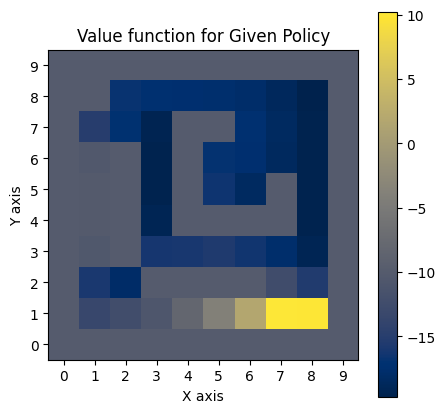

In [37]:
def policy_evaluation(policy, state_reward_map, action_reward_map, gamma=0.9, theta=1e-4):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [(10,10) numpy array] The policy to evaluate, where policy[x, y] gives the action to take at position (x, y).
        transition_matrix: [(100,100) numpy array] State transition probabilities for each action.
        state_reward_map: [(100,) numpy array] Immediate rewards for all states.
        action_cost_map: [(100,100) numpy array] The cost of taking an action from state i to state j. NO LONGER NEEDED
        gamma: float, Discount factor.
        theta: float, A threshold of change for the value function to determine convergence.
        
    Returns:
        V: (100,) numpy array, The value for each state under the specified policy.
    """
    V = np.zeros(100)
    V_vis = V.reshape(10, 10)

    obstacle_coords = [[9, 9], [8, 9], [7, 9], [6, 9], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [0, 9], [9, 8], [9, 7],
                       [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [9, 0], [0, 0], [1, 0], [2, 0], [3, 0], [4, 0],
                       [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7],
                       [0, 8], [0, 9], [3, 2], [4, 2], [5, 2], [6, 2], [4, 4], [4, 5], [4, 6], [4, 7], [5, 7], [7, 4],
                       [7, 5]]
    goal_coords = [[8, 1]]
    obstacle_states = [map_x_y_to_state(cell[0], cell[1]) for cell in obstacle_coords]
    goal_states = [map_x_y_to_state(cell[0], cell[1]) for cell in goal_coords]
    
    transition_matrix = get_transition_matrix(policy)

    for iteration in range(100):
        V_prev = deepcopy(V)
        delta = 0
        for s in range(100):
            # Skip the obstacle and goal states
            if s in obstacle_states or s in goal_states:
                V[s] = state_reward_map[s]
                continue
            
            # For all normal states
            # Convert state index to (x, y) coordinate
            x, y = s % 10, s // 10
            
            # Initialize a variable to keep track of the best action value
            best_action_value = -np.inf
            
            # Compare all possible actions to find the best one
            for a in range(4):
                action_value = 0
                for s_prime in range(100):
                    action_value += transition_matrix[s, s_prime] * (state_reward_map[s_prime] + action_reward_map[s, s_prime] + gamma * V_prev[s_prime])
                if action_value > best_action_value:
                    best_action_value = action_value
            
            # Update the value of state s
            V[s] = best_action_value
            delta = max(delta, np.abs(V[s] - V_prev[s]))

    # print(f'Policy evaluated in {iteration} iterations')
    return V
    

test_flag = True
if test_flag:
    # Test policy_evaluation
    # Initialize a static policy
    policy = 1 * np.ones((10, 10), dtype=int)
    policy = make_policy_valid(policy)
    V = policy_evaluation(policy, state_reward_map, action_reward_map)
    print(V[map_x_y_to_state(1,3)], V[map_x_y_to_state(3,1)], V[map_x_y_to_state(8,1)])
    
    # Convert V to a 10x10 matrix for visualization
    # Be careful that the origin is in the bottom-left corner
    V_2D = V.reshape(10, 10)
    print("V-2D: ")
    np.set_printoptions(precision=2)
    print(V_2D)
    
    # Visualize the value function
    # V[map_x_y_to_state(8, 1)] = 100  # Use this to indentify the goal state
    plt.figure(figsize=(5, 5))
    plt.imshow(V_2D, cmap='cividis', origin='lower')
    plt.colorbar()
    plt.title('Value function for Given Policy')
    plt.xticks(range(10))
    plt.yticks(range(10))
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()


In [38]:
def policy_improvement(V, policy, state_reward_map, action_cost_map, gamma=0.9):
    """
    Improve a policy given the value function.
    
    Args:
        V: [(100,) numpy array] The value for each state under the specified policy.
        policy: [(10,10) numpy array] The policy to evaluate, where policy[x, y] gives the action to take at position (x, y).
        transition_matrix: [(100,100) numpy array] State transition probabilities for each action.
        state_reward_map: [(100,) numpy array] Immediate rewards for all states.
        action_cost_map: [(100,100) numpy array] The cost of taking an action from state i to state j.
        gamma: float, Discount factor.
        
    Returns:
        policy: [10x10 numpy array] The improved policy.
        policy_stable: [bool] Whether the policy is stable.
    """
    obstacle_coords = [[9, 9], [8, 9], [7, 9], [6, 9], [5, 9], [4, 9], [3, 9], [2, 9], [1, 9], [0, 9],
                  [9, 8], [9, 7], [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [9, 0],
                  [0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0],
                  [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9],
                  [3, 2], [4, 2], [5, 2], [6, 2],
                  [4, 4], [4, 5], [4, 6], [4, 7], [5, 7],
                  [7, 4], [7, 5]]
    goal_coords = [[8, 1]]
    
    obstacle_states = [map_x_y_to_state(cell[0], cell[1]) for cell in obstacle_coords]
    goal_states = [map_x_y_to_state(cell[0], cell[1]) for cell in goal_coords]    
    
    transition_matrix = get_transition_matrix(policy)
    
    policy_stable = True  # Initialize policy_stable to True

    ## For debugging
    V_visual = V.reshape(10, 10)
    
    for s in range(100):
        # Skip the obstacle and goal states
        if s in obstacle_states or s in goal_states:
            policy[s % 10, s // 10] = -1
            continue
        
        # For all normal states
        # Convert state index to (x, y) coordinate
        x, y = s % 10, s // 10
        
        # Initialize a variable to keep track of the best action value
        best_action_value = -np.inf
        best_action = None
        
        # Compare all possible actions to find the best one
        # a = -1 (stay)
        action_value = 0
        for s_prime in range(100):
            action_value += transition_matrix[s, s_prime] * (state_reward_map[s_prime] + action_cost_map[s, s_prime] + gamma * V[s_prime])
        if action_value > best_action_value:
            best_action_value = action_value
            best_action = -1

        # a = 0 (N)
        action_value = 0
        if y < 9:
            s_prime = s + 10
            action_value += transition_matrix[s, s_prime] * (state_reward_map[s_prime] + action_cost_map[s, s_prime] + gamma * V[s_prime])
        else:
            action_value += transition_matrix[s, s] * (state_reward_map[s] + action_cost_map[s, s] + gamma * V[s])
        if action_value > best_action_value:
            best_action_value = action_value
            best_action = 0

        # a = 1 (E)
        action_value = 0
        if x < 9:
            s_prime = s + 1
            action_value += transition_matrix[s, s_prime] * (state_reward_map[s_prime] + action_cost_map[s, s_prime] + gamma * V[s_prime])
        else:
            action_value += transition_matrix[s, s] * (state_reward_map[s] + action_cost_map[s, s] + gamma * V[s])
        if action_value > best_action_value:
            best_action_value = action_value
            best_action = 1

        # a = 2 (S)
        action_value = 0
        if y > 0:
            s_prime = s - 10
            action_value += transition_matrix[s, s_prime] * (state_reward_map[s_prime] + action_cost_map[s, s_prime] + gamma * V[s_prime])
        else:
            action_value += transition_matrix[s, s] * (state_reward_map[s] + action_cost_map[s, s] + gamma * V[s])
        if action_value > best_action_value:
            best_action_value = action_value
            best_action = 2

        # a = 3 (W)
        action_value = 0
        if x > 0:
            s_prime = s - 1
            action_value += transition_matrix[s, s_prime] * (state_reward_map[s_prime] + action_cost_map[s, s_prime] + gamma * V[s_prime])
        else:
            action_value += transition_matrix[s, s] * (state_reward_map[s] + action_cost_map[s, s] + gamma * V[s])
        if action_value > best_action_value:
            best_action_value = action_value
            best_action = 3

        # Check if the found best action differs from the current policy
        current_action = policy[x, y]
        if best_action != current_action:
            policy_stable = False
            policy[x, y] = best_action  # Update the policy with the new best action

    return policy, policy_stable

In [49]:
def policy_iteration(policy, state_reward_map, action_cost_map, gamma=0.9, theta=1e-4, save_for_vis=False, max_iter=100):
    """
    Perform policy iteration to find the optimal policy.
    
    Args:
        policy: [10x10 numpy array] The initial policy to evaluate.
        state_reward_map: [numpy array] Immediate rewards for all states.
        gamma: float, Discount factor.
        theta: float, A threshold of change for the value function to determine convergence.
        
    Returns:
        policy: [10x10 numpy array] The optimal policy.
    """
    policy_stable = False  # Initialize policy_stable to False
    
    # We want to save the evaluation and improvement results in the first 5 iterations and the last iteration
    # This is to visualize the policy improvement process
    V = None
    V_list = []
    policy_list = []
    iteration = 0
    while iteration < max_iter:
        
        if iteration % 10 == 0:
            print(f'Policy iteration in progress, iteration {iteration}')
        
        iteration += 1
        V = policy_evaluation(policy, state_reward_map, action_cost_map, gamma, theta)
        policy, policy_stable = policy_improvement(V, policy, state_reward_map, action_cost_map, gamma)
        # policy = make_policy_valid(policy)
        if iteration <= 5 or policy_stable:
            V_list.append(V)
            policy_list.append(policy)
        if policy_stable:
            break
            
    print(f'Policy iteration converged in {iteration} iterations')
    
    if save_for_vis:
        return policy, policy_stable, V, V_list, policy_list
    else:
        return policy, policy_stable, V
    

In [50]:
# Test policy_iteration
# Initialize the policy where the agent always moves N, i.e., policy[x, y] = 1 for all non-obstacle/goal cells
policy = 1 * np.ones((10, 10), dtype=int)
policy = make_policy_valid(policy)
transition_matrix = get_transition_matrix(policy)
policy, convergence, V = policy_iteration(policy, state_reward_map, action_reward_map)
print("Converged =", convergence)
print(policy)


Policy iteration in progress, iteration 0
Policy iteration in progress, iteration 10
Policy iteration in progress, iteration 20
Policy iteration in progress, iteration 30
Policy iteration in progress, iteration 40
Policy iteration in progress, iteration 50
Policy iteration in progress, iteration 60
Policy iteration in progress, iteration 70
Policy iteration in progress, iteration 80
Policy iteration in progress, iteration 90
Policy iteration converged in 100 iterations
Converged = False
[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1  1  1  1  1  1  1  0 -1]
 [-1  1  1  0  0  0  0  1  1 -1]
 [-1  1 -1  1  1  1  1  1  1 -1]
 [-1  1 -1  1 -1 -1 -1 -1  1 -1]
 [-1  1 -1  1  0  1  1 -1  1 -1]
 [-1  1 -1  3  0  1  1  1  1 -1]
 [-1  1  2  1 -1 -1  1  1  1 -1]
 [-1 -1  2  2  2  1  1  1  1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


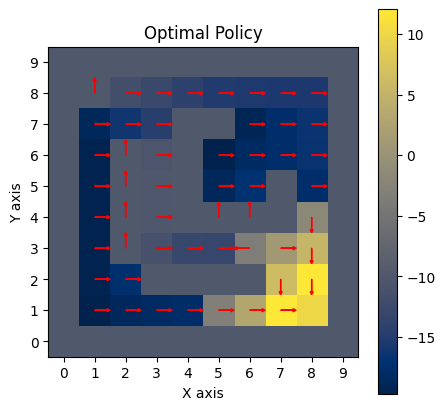

In [51]:
# Visualize the policy using arrows
# The origin is in the bottom-left corner
# The arrows are in the same direction as the action
# The arrows are in the center of the cell
# No arrow is shown for obstacle cells and goal cells
plt.figure(figsize=(5, 5))
plt.imshow(V.reshape(10,10), cmap='cividis', origin='lower')
plt.colorbar()
plt.title('Optimal Policy')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('X axis')
plt.ylabel('Y axis')
# policy[3, 7] = 3  # Use this to see if the policy is correctly visualized at desired coordinates
for y in range(10):
    for x in range(10):
        if [x, y] in obstacle_coords or [x, y] in goal_coords:
            continue
        if policy[x, y] == 0:  # N
            plt.arrow(x, y, 0, 0.4, head_width=0.1, head_length=0.1, fc='r', ec='r')
        elif policy[x, y] == 1:  # E
            plt.arrow(x, y, 0.4, 0, head_width=0.1, head_length=0.1, fc='r', ec='r')
        elif policy[x, y] == 2:  # S
            plt.arrow(x, y, 0, -0.4, head_width=0.1, head_length=0.1, fc='r', ec='r')
        elif policy[x, y] == 3:  # W
            plt.arrow(x, y, -0.4, 0, head_width=0.1, head_length=0.1, fc='r', ec='r')
plt.show()
